# Care Team Engagment Prediction - NXGBoost

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [88]:
%matplotlib inline

In [89]:
# Read local data file
df1 = pd.read_csv('regressionData1.csv')
#df1 = pd.read_csv('binaryData1.csv')


In [90]:
df1.shape

(72490, 85)

In [91]:
df1.columns



Index(['days_to_first_et', 'days_to_coach', 'days_to_kit', 'acceptance_month',
       'user_age', 'bio_length', 'reasons_length', 'imagine_free_length',
       'reason_limited_time', 'reason_family_obligations',
       'reason_work_obligations', 'reason_other', 'pain_severity', 'pain_vas',
       'pain_description_length', 'weight', 'bmi', 'gad', 'phq',
       'is_sedentary', 'is_overweight', 'is_passive_coping',
       'is_catastrophizing', 'hours_to_complete_aq', 'conversations',
       'user_initiated_conv', 'hh_initiated_conv',
       'inbound_coach_messages_1_week', 'inbound_member_messages_1_week',
       'inbound_coach_messages_length_1_week', 'conversation_density',
       'week_1_words', 'night_messages', 'morning_messages',
       'afternoon_messages', 'evening_message', 'count_text_msg_from_coach',
       'days_to_first_text_msg_from_user', 'days_to_first_text_msg_from_coach',
       'count_opr_msg_from_coach', 'is_repeat', 'first_et_before_coach',
       'first_user_msg_bef

### Split data into training and testing

In [92]:
col = df1.columns.tolist()
col.remove('Y')
X = df1[col]
y = df1['Y']
#X = df1.iloc[:, 0:-1].values
#y = df1.iloc[:, -1].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [94]:
for i, name in enumerate(df1.columns):
    print(i,name)

0 days_to_first_et
1 days_to_coach
2 days_to_kit
3 acceptance_month
4 user_age
5 bio_length
6 reasons_length
7 imagine_free_length
8 reason_limited_time
9 reason_family_obligations
10 reason_work_obligations
11 reason_other
12 pain_severity
13 pain_vas
14 pain_description_length
15 weight
16 bmi
17 gad
18 phq
19 is_sedentary
20 is_overweight
21 is_passive_coping
22 is_catastrophizing
23 hours_to_complete_aq
24 conversations
25 user_initiated_conv
26 hh_initiated_conv
27 inbound_coach_messages_1_week
28 inbound_member_messages_1_week
29 inbound_coach_messages_length_1_week
30 conversation_density
31 week_1_words
32 night_messages
33 morning_messages
34 afternoon_messages
35 evening_message
36 count_text_msg_from_coach
37 days_to_first_text_msg_from_user
38 days_to_first_text_msg_from_coach
39 count_opr_msg_from_coach
40 is_repeat
41 first_et_before_coach
42 first_user_msg_before_coach
43 kit_arrival_before_coach
44 back
45 hip
46 knee
47 neck
48 shoulder
49 F
50 M
51 O
52 East North Cen

# XGBoost

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
sklearn.__version__

'0.24.2'

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=4000,random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

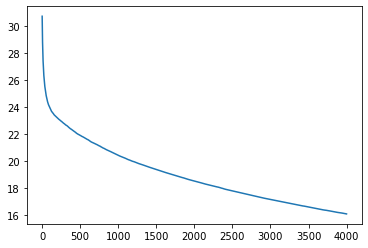

In [97]:
plt.plot(reg.train_score_)
plt.show

In [98]:
y_test.shape

(14498,)

In [99]:
y_pred.shape

(14498,)

In [100]:
y_test1 = (y_test>7).astype(int)
y_pred1 = (y_pred>7).astype(int)
f1_score(y_test1, y_pred1)

0.4373323797604148

In [101]:
confusion_matrix(y_test1, y_pred1)

array([[10128,  1250],
       [ 1897,  1223]])

In [106]:
lst = list(zip(df1.columns, reg.feature_importances_))
lst.sort(key=lambda x:x[1], reverse=True)
for i, item in enumerate(lst[0:20]):
    print (i, item)

0 ('inbound_coach_messages_1_week', 0.07328489499994764)
1 ('week_1_words', 0.06431703761261372)
2 ('inbound_coach_messages_length_1_week', 0.05916202558093622)
3 ('acceptance_month', 0.05815341038968416)
4 ('days_to_coach', 0.05210939699055783)
5 ('kit_arrival_before_coach', 0.0477055003601043)
6 ('reasons_length', 0.04766872712107503)
7 ('user_age', 0.0455024407565634)
8 ('bmi', 0.04492649635847346)
9 ('hh_initiated_conv', 0.04178282880268712)
10 ('imagine_free_length', 0.035545322750986395)
11 ('bio_length', 0.03462693607722738)
12 ('count_text_msg_from_coach', 0.031040037352104713)
13 ('pain_vas', 0.030796170153798468)
14 ('conversation_density', 0.025328229492360875)
15 ('pain_description_length', 0.024700361593646105)
16 ('days_to_first_text_msg_from_user', 0.021136337446319462)
17 ('weight', 0.020438787801989905)
18 ('count_opr_msg_from_coach', 0.019171945014774237)
19 ('hours_to_complete_aq', 0.016020215387453397)


In [ ]:
#X_test['y_test'] = y_test
#X_test['y_pred'] = y_pred
X_test['wrong'] = y_test - y_pred
err1 = X_test[X_test['wrong'] > 0]
err2 = X_test[X_test['wrong'] < 0]

In [82]:
X_test['wrong'].value_counts()

 0    12820
 1     2478
-1      478
Name: wrong, dtype: int64

In [ ]:
err1

In [261]:
y_pred = clf.predict(X_test)

In [262]:
confusion_matrix(y_test, y_pred)

array([[12035,   347],
       [ 2535,   720]])

In [263]:
f1_score(y_test, y_pred)

0.3331790837575197

In [164]:
y_test

30597    0
69890    0
69566    0
30505    0
74130    0
        ..
26110    0
38279    0
49592    0
33111    0
77229    0
Name: Y, Length: 15799, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

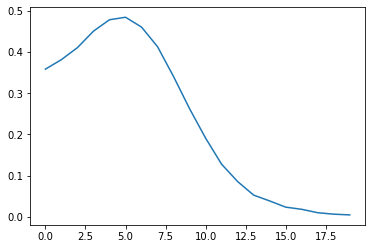

In [167]:
plt.plot(results)
plt.show

In [169]:
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)


In [170]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import multiprocessing

In [ ]:
xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [5, 10, 15, 20, 25, 30],
                               'n_estimators': [50, 100, 200, 400, 800]}, 
                               verbose=1,
                               n_jobs=1)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# Using XGBoost library

In [ ]:
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import os



# simple example
# load file from text file, also binary buffer generated by xgboost
dtrain = xgb.DMatrix(os.path.join(DEMO_DIR, 'data', 'agaricus.txt.train?indexing_mode=1'))
dtest = xgb.DMatrix(os.path.join(DEMO_DIR, 'data', 'agaricus.txt.test?indexing_mode=1'))

# specify parameters via map, definition are same as c++ version
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}

# specify validations set to watch performance
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 2
bst = xgb.train(param, dtrain, num_round, watchlist)

# this is prediction
preds = bst.predict(dtest)
labels = dtest.get_label()